# Final Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV


In [5]:
!pip install wbgapi # Using the World Bank API to access the needed dataset
import wbgapi as wb

In [6]:
wb.series.info(q="GDP")
wb.series.info(q="poverty")
wb.series.info(q="income")
wb.series.info(q="share")# Checking on different indicators to extract the index of list of variables

id,value
CM.MKT.TRNR,"Stocks traded, turnover ratio of domestic shares (%)"
SE.LPV.PRIM,Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.FE,Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SE.LPV.PRIM.MA,Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)
SH.DYN.AIDS.FE.ZS,Women's share of population ages 15+ living with HIV (%)
SI.DST.02ND.20,Income share held by second 20%
SI.DST.03RD.20,Income share held by third 20%
SI.DST.04TH.20,Income share held by fourth 20%
SI.DST.05TH.20,Income share held by highest 20%
SI.DST.10TH.10,Income share held by highest 10%


In [7]:
# Descriptions of each variable
descriptions = {
    'gdp_per_capita': 'GDP per capita, PPP (current international $)',
    'gdp_growth': 'GDP growth (annual %)',
    'poverty_rate': 'Poverty headcount ratio at $3.00/day (2021 PPP) (% of population)',
    'life_expectancy': 'Life expectancy at birth, total (years)',
    'child_mortality': 'Mortality rate, under-5 (per 1,000 live births)',
    'secondary_enrollment_net': 'School enrollment, secondary (% net)',
    'secondary_enrollment_female': 'School enrollment, secondary, female (% net)',
    'secondary_enrollment_male': 'School enrollment, secondary, male (% net)',
    'unemployment_rate': 'Unemployment, total (% of total labor force)',
    'industry_employment_pct': 'Employment in industry (% of total employment)',
    'agriculture_employment_pct': 'Employment in agriculture (% of total employment)',
    'service_employment_pct': 'Employment in service (% of total employment)',
    'income_highest20': 'Income share held by highest 20%',
    'income_lowest20': 'Income share held by lowest 20%'
}

In [8]:
# Each of the World Bank code is assigned to the respective variables for dataframe creation

indicators={'NY.GDP.PCAP.PP.CD': 'gdp_per_capita',
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth',
    'SI.POV.DDAY': 'poverty_rate',
    'SP.DYN.LE00.IN': 'life_expectancy',
    'SH.DYN.MORT': 'child_mortality',
    'SE.SEC.NENR': 'secondary_enrollment_net',
    'SE.SEC.NENR.FE': 'secondary_enrollment_female',
    'SE.SEC.NENR.MA': 'secondary_enrollment_male',
    'SL.UEM.TOTL.ZS': 'unemployment_rate',
    'SL.IND.EMPL.ZS': 'industry_employment_pct',
    'SL.AGR.EMPL.ZS': 'agriculture_employment_pct',
    'SL.SRV.EMPL.ZS': 'service_employment_pct',
    'SI.DST.05TH.20':	'Income share held by highest 20%',
    'SI.DST.FRST.20':	'Income share held by lowest 20%'
}

In [9]:
# Years of interest
years = [2017, 2018, 2019]

# Creating dataframe for all countries
dev_df = wb.data.DataFrame(
    indicators.keys(),
    economy='all',
    time=years,
    labels=True,
    columns='series'
)

# Rename indicator columns
dev_df.rename(columns=indicators, inplace=True)


In [10]:
dev_df.head()

Country  Time  gdp_growth  gdp_per_capita  \
economy time                                                 
ZWE     YR2019  Zimbabwe  2019   -6.332450     4165.555678   
        YR2018  Zimbabwe  2018    5.009922     3992.890719   
        YR2017  Zimbabwe  2017    4.734411    10756.445442   
ZMB     YR2019    Zambia  2019    1.441306     3361.397503   
        YR2018    Zambia  2018    4.034494     3442.273072   

                secondary_enrollment_net  secondary_enrollment_female  \
economy time                                                            
ZWE     YR2019                       NaN                          NaN   
        YR2018                       NaN                          NaN   
        YR2017                       NaN                          NaN   
ZMB     YR2019                       NaN                          NaN   
        YR2018                       NaN                          NaN   

                secondary_enrollment_male  child_mortality  \
economy time                                                 
ZWE     YR2019                        NaN             51.1   
        YR2018                        NaN             52.3   
        YR2017                        NaN             55.0   
ZMB     YR2019                        NaN             54.1   
        YR2018                        NaN             55.2   

                Income share held by highest 20%  \
economy time                                       
ZWE     YR2019                              56.1   
        YR2018                               NaN   
        YR2017                              51.1   
ZMB     YR2019                               NaN   
        YR2018                               NaN   

                Income share held by lowest 20%  poverty_rate  \
economy time                                                    
ZWE     YR2019                              4.8          49.2   
        YR2018                              NaN           NaN   
        YR2017                              6.0          44.7   
ZMB     YR2019                              NaN           NaN   
        YR2018                              NaN           NaN   

                agriculture_employment_pct  industry_employment_pct  \
economy time                                                          
ZWE     YR2019                   62.397972                11.195970   
        YR2018                   63.367629                10.238358   
        YR2017                   64.736407                 9.271968   
ZMB     YR2019                   57.371857                 9.092188   
        YR2018                   59.777997                 9.944708   

                service_employment_pct  unemployment_rate  life_expectancy  
economy time                                                                
ZWE     YR2019               26.406076              7.373           61.060  
        YR2018               26.394012              6.793           60.906  
        YR2017               25.991606              6.344           60.263  
ZMB     YR2019               33.535938              5.542           62.914  
        YR2018               30.277295              5.033           62.138

In [11]:
dev_df.shape # The size of dataset

(798, 16)

In [12]:
dev_df.isna().sum() # Checking if there are any missing values and summing them up

,0
Country,0
Time,0
gdp_growth,23
gdp_per_capita,57
secondary_enrollment_net,527
secondary_enrollment_female,533
secondary_enrollment_male,533
child_mortality,66
Income share held by highest 20%,549
Income share held by lowest 20%,549


# Countrywise Imputation

In [13]:
# Imputing secondary enrollment data by countrywise first using mean

dev_df["secondary_enrollment_net"] = dev_df["secondary_enrollment_net"].fillna(
    dev_df.groupby("Country")["secondary_enrollment_net"].transform("mean")
)

dev_df["secondary_enrollment_female"] = dev_df["secondary_enrollment_female"].fillna(
    dev_df.groupby("Country")["secondary_enrollment_female"].transform("mean")
)

dev_df["secondary_enrollment_male"] = dev_df["secondary_enrollment_male"].fillna(
    dev_df.groupby("Country")["secondary_enrollment_male"].transform("mean")
)


In [14]:
dev_df["poverty_rate"] = dev_df["poverty_rate"].fillna(
    dev_df.groupby("Country")["poverty_rate"].transform("mean")
)

dev_df["unemployment_rate"] = dev_df["unemployment_rate"].fillna(
    dev_df.groupby("Country")["unemployment_rate"].transform("mean")
)


In [15]:
dev_df["child_mortality"] = dev_df["child_mortality"].fillna(
    dev_df.groupby("Country")["child_mortality"].transform("mean")
)

dev_df["life_expectancy"] = dev_df["life_expectancy"].fillna(
    dev_df.groupby("Country")["life_expectancy"].transform("mean")
)


In [16]:
dev_df["agriculture_employment_pct"] = dev_df["agriculture_employment_pct"].fillna(
    dev_df.groupby("Country")["agriculture_employment_pct"].transform("mean")
)

dev_df["industry_employment_pct"] = dev_df["industry_employment_pct"].fillna(
    dev_df.groupby("Country")["industry_employment_pct"].transform("mean")
)

dev_df["service_employment_pct"] = dev_df["service_employment_pct"].fillna(
    dev_df.groupby("Country")["service_employment_pct"].transform("mean")
)


In [17]:
dev_df["gdp_per_capita"] = dev_df["gdp_per_capita"].fillna(
    dev_df.groupby("Country")["gdp_per_capita"].transform("mean")
)


In [18]:
dev_df.isna().sum() # Checking if there are any missing values and summing them up

,0
Country,0
Time,0
gdp_growth,23
gdp_per_capita,57
secondary_enrollment_net,294
secondary_enrollment_female,303
secondary_enrollment_male,303
child_mortality,66
Income share held by highest 20%,549
Income share held by lowest 20%,549


# Timewise Imputation

Secondary Enrollment

In [19]:
# In case of year wise imputation, I imputed using emdian because some extreme values might skew the overall imputation

dev_df["secondary_enrollment_net"] = dev_df["secondary_enrollment_net"].fillna(
    dev_df.groupby("Time")["secondary_enrollment_net"].transform("median")
).fillna(
    dev_df["secondary_enrollment_net"].median()
)

dev_df["secondary_enrollment_female"] = dev_df["secondary_enrollment_female"].fillna(
    dev_df.groupby("Time")["secondary_enrollment_female"].transform("median")
).fillna(
    dev_df["secondary_enrollment_female"].median()
)

dev_df["secondary_enrollment_male"] = dev_df["secondary_enrollment_male"].fillna(
    dev_df.groupby("Time")["secondary_enrollment_male"].transform("median")
).fillna(
    dev_df["secondary_enrollment_male"].median()
)

Poverty Rate and Unemployment Rate

In [20]:
dev_df["poverty_rate"] = dev_df["poverty_rate"].fillna(
    dev_df.groupby("Time")["poverty_rate"].transform("median")
).fillna(
    dev_df["poverty_rate"].median()
)

dev_df["unemployment_rate"] = dev_df["unemployment_rate"].fillna(
    dev_df.groupby("Time")["unemployment_rate"].transform("median")
).fillna(
    dev_df["unemployment_rate"].median()
)

Child Mortality and Life Expectancy

In [21]:
dev_df["child_mortality"] = dev_df["child_mortality"].fillna(
    dev_df.groupby("Time")["child_mortality"].transform("mean")
).fillna(
    dev_df["child_mortality"].median()
)

dev_df["life_expectancy"] = dev_df["life_expectancy"].fillna(
    dev_df.groupby("Time")["life_expectancy"].transform("mean")
).fillna(
    dev_df["life_expectancy"].median()
)


Employment Share

In [22]:
dev_df["agriculture_employment_pct"] = dev_df["agriculture_employment_pct"].fillna(
    dev_df.groupby("Time")["agriculture_employment_pct"].transform("median")
).fillna(
    dev_df["agriculture_employment_pct"].median()
)

dev_df["industry_employment_pct"] = dev_df["industry_employment_pct"].fillna(
    dev_df.groupby("Time")["industry_employment_pct"].transform("median")
).fillna(
    dev_df["industry_employment_pct"].median()
)

dev_df["service_employment_pct"] = dev_df["service_employment_pct"].fillna(
    dev_df.groupby("Time")["service_employment_pct"].transform("median")
).fillna(
    dev_df["service_employment_pct"].median()
)


In [23]:
dev_df["gdp_per_capita"] = dev_df["gdp_per_capita"].fillna(
    dev_df.groupby("Time")["gdp_per_capita"].transform("median")
)


In [24]:
dev_df.isna().sum() # Checking if there are any missing values and summing them up

,0
Country,0
Time,0
gdp_growth,23
gdp_per_capita,0
secondary_enrollment_net,0
secondary_enrollment_female,0
secondary_enrollment_male,0
child_mortality,0
Income share held by highest 20%,549
Income share held by lowest 20%,549


In [25]:
dev_df = dev_df.dropna(subset=["gdp_growth"]).reset_index(drop=True) # Dropping the missing gdp growth rate which is our target

# EDA

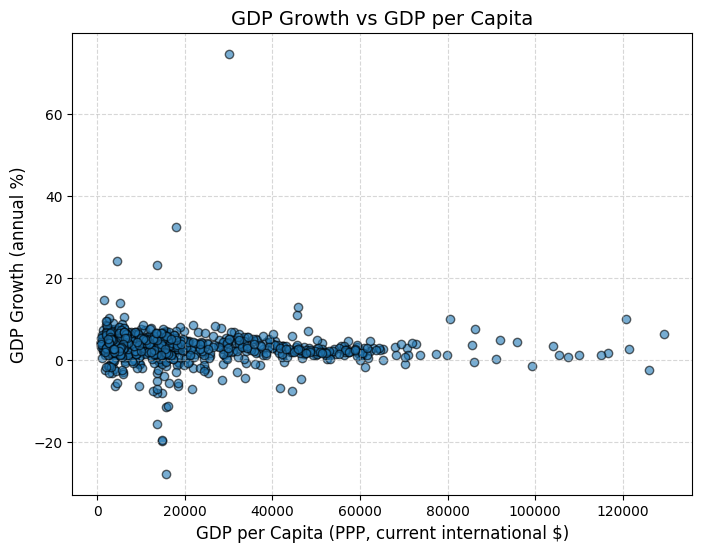

In [26]:
# Scatter plot of GDP per capita vs GDP growth

plt.figure(figsize=(8, 6)) # Customizing the size of plot
plt.scatter(dev_df['gdp_per_capita'], dev_df['gdp_growth'], alpha=0.6, edgecolor='k') # Plotting GDP per capita on x-axis and GDP Growth on Y-axis

plt.title('GDP Growth vs GDP per Capita', fontsize=14) # Naming the Plot Title
plt.xlabel('GDP per Capita (PPP, current international $)', fontsize=12) # Naming the axis
plt.ylabel('GDP Growth (annual %)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) # Shows the grid on the background, easy for visualising each point (if needed)

plt.show()


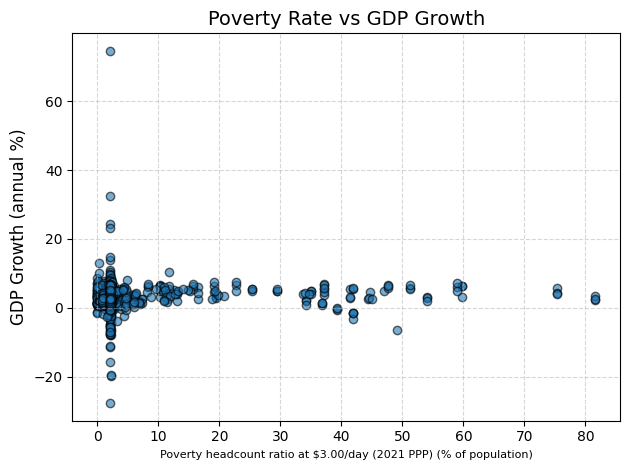

In [27]:
plt.scatter(dev_df['poverty_rate'], dev_df['gdp_growth'], alpha=0.6, edgecolor='k')

plt.title('Poverty Rate vs GDP Growth', fontsize=14)
plt.ylabel('GDP Growth (annual %)', fontsize=12)
plt.xlabel('Poverty headcount ratio at $3.00/day (2021 PPP) (% of population)', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

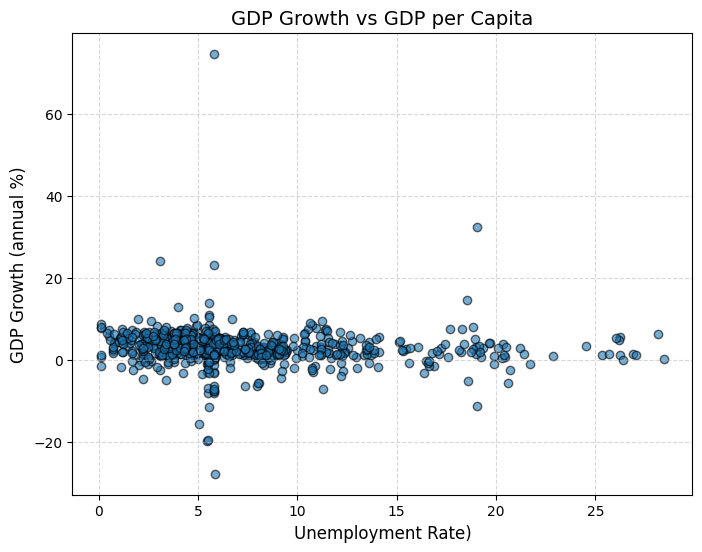

In [28]:
# Scatter plot of GDP per capita vs GDP growth

plt.figure(figsize=(8, 6)) # Customizing the size of plot
plt.scatter(dev_df['unemployment_rate'], dev_df['gdp_growth'], alpha=0.6, edgecolor='k') # Plotting GDP per capita on x-axis and GDP Growth on Y-axis

plt.title('GDP Growth vs GDP per Capita', fontsize=14) # Naming the Plot Title
plt.xlabel('Unemployment Rate)', fontsize=12) # Naming the axis
plt.ylabel('GDP Growth (annual %)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) # Shows the grid on the background, easy for visualising each point (if needed)

plt.show()

# Now Onto Predictive Modelling

The income share variables and the poverty rate variables are dropped before running a regression, because more than 50% of the data points were missing. I believe having a more comprehensive poverty data might have added mroe predicitveness to the model.

In [29]:
# Features with zero missing values
features = [
    "gdp_per_capita",
    "secondary_enrollment_net",
    "secondary_enrollment_female",
    "secondary_enrollment_male",
    "child_mortality",
    "agriculture_employment_pct",
    "industry_employment_pct",
    "service_employment_pct",
    "unemployment_rate",
    "life_expectancy",
]

# Setting up the target and independent variables

X = dev_df[features]
y = dev_df["gdp_growth"]


In [30]:
# Splitting Train-Test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [31]:
# Standardizing the variables since they are on a different scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test_scaled) # calculating the y based on our model (prediction)

r2 = r2_score(y_test, y_pred) # calculates r2
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # calculates root mean squared error
mae = mean_absolute_error(y_test, y_pred) # calculates mean absolute error

print(f"R²   : {r2:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")


R²   : -0.0543
RMSE : 6.7209
MAE  : 2.6431


In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Baseline prediction: mean of training target
baseline_pred = np.repeat(y_train.mean(), len(y_test))

#baseline statistics
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

#model statistics
model_mse = mean_squared_error(y_test, y_pred)
model_rmse = np.sqrt(model_mse)

print("Baseline MSE :", baseline_mse)
print("Model MSE    :", model_mse)
print("Baseline RMSE:", baseline_rmse)
print("Model RMSE   :", model_rmse)

Baseline MSE : 44.180707332217885
Model MSE    : 45.17086451498052
Baseline RMSE: 6.6468569513882185
Model RMSE   : 6.720927355282195


# Polynomial Regression

In [35]:
#Pipeline for the polynomial model

poly_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])


In [36]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
# Same thing as above, but for the polynomial model

y_pred = poly_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


RMSE: 7.0829
MSE : 50.1671
R²  : -0.1709


# Grid Search

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("model", Ridge())
])

In [43]:
param_grid = {
    "poly__degree": [1, 2, 3, 4],                 # Polynomial degrees
    "model__alpha": np.logspace(-4, 4, 25)        # Regularization Strengths of the model
}

gs = GridSearchCV(
    pipe,                             # tuned pipeline as defined above
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)              # Runniing grid search on the training data

print("Best params:", gs.best_params_)
print("Best CV MSE:", -gs.best_score_)


Best params: {'model__alpha': np.float64(100.0), 'poly__degree': 3}
Best CV MSE: 12.57591985046746


# Regression Output

In [51]:
# this new X are created after dropping few variable to correct for multicollinearity. Having said that, causal inference remains largely vague given the simplicity and too less controls.

features_new = [
    "gdp_per_capita",
    "secondary_enrollment_net",
    "secondary_enrollment_female",
    "child_mortality",
    "industry_employment_pct",   # relative to services
    "unemployment_rate",
    "life_expectancy",
]

X = dev_df[features_new]
y = dev_df["gdp_growth"]


In [52]:
import statsmodels.api as sm

X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.906
Date:                Fri, 19 Dec 2025   Prob (F-statistic):            0.00527
Time:                        01:16:23   Log-Likelihood:                -2255.4
No. Observations:                 775   AIC:                             4527.
Df Residuals:                     767   BIC:                             4564.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

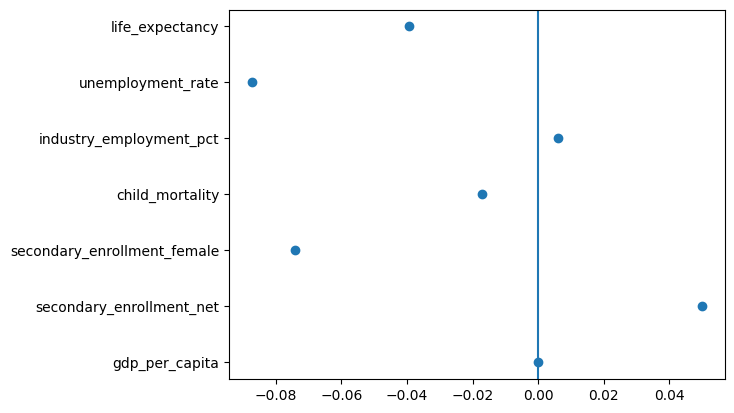

In [57]:
coefs = model.params.drop("const")

plt.scatter(coefs, coefs.index)
plt.axvline(0)
plt.show()

Industry job percentage and net secodnary school enrollment shows positive impact on GDP growth while other variables are shown to have negative impact, which in fact makes sense from economic point of view.